## Online Course Completion 

Given a data on students enrolled in an online course, we would like to predict whether or not a student completes the course. The metrics used in the data set are: 

**UserID:** Unique identifier for each user

**CourseCategory:** Category of the course taken by the user (e.g., Programming, Business, Arts)

**TimeSpentOnCourse:** Total time spent by the user on the course in hours

**NumberOfVideosWatched:** Total number of videos watched by the user

**NumberOfQuizzesTaken:** Total number of quizzes taken by the user

**QuizScores:** Average scores achieved by the user in quizzes (percentage)

**CompletionRate:** Percentage of course content completed by the user

**DeviceType:** Type of device used by the user (Device Type: Desktop (0) or Mobile (1))

**CourseCompletion:** Course completion status (0: Not Completed, 1: Completed)


Data Source: __[10.34740/kaggle/dsv/8725325](10.34740/kaggle/dsv/8725325)__

### Import Libraries and Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('online_course_engagement_data.csv')

### Exploratory Data Analysis

In [3]:
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


 
 Let's check for duplicate values 

In [6]:
df.duplicated().sum()

877

In [7]:
df = df.drop_duplicates(keep = 'first')
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


Text(0.5, 1.0, 'Count of Course Categories')

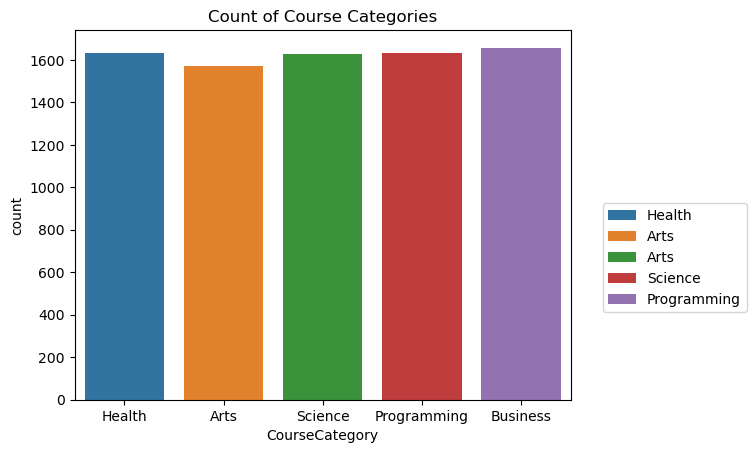

In [12]:
sns.countplot(df, x = 'CourseCategory',hue = 'CourseCategory')
plt.legend(bbox_to_anchor = (1.05,0.55),labels = df['CourseCategory'])
plt.title('Count of Course Categories')

Text(0.5, 1.0, 'Course Completion')

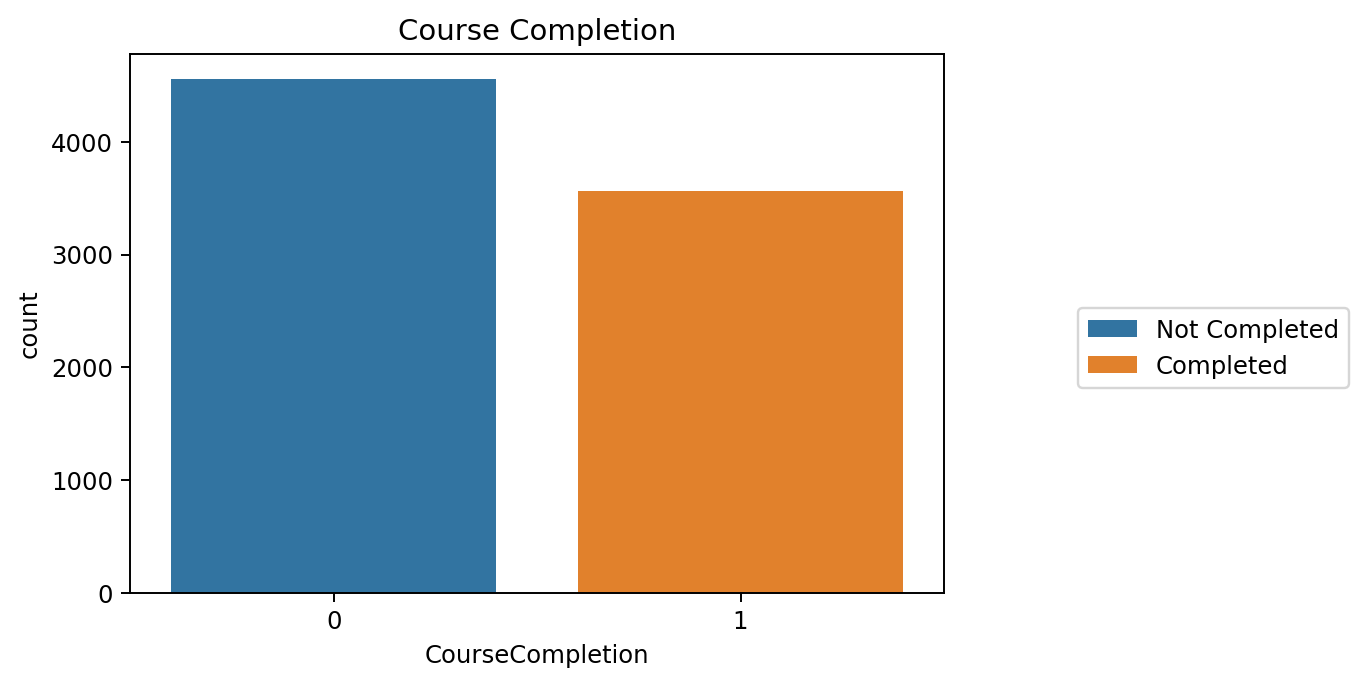

In [13]:
plt.figure(figsize = (6,4),dpi = 175)
sns.countplot(df, x = 'CourseCompletion',hue = 'CourseCompletion')
plt.legend(bbox_to_anchor = (1.15,0.55),labels = ['Not Completed','Completed'])
plt.title('Course Completion')

Text(0.5, 1.0, 'Count of Device Type')

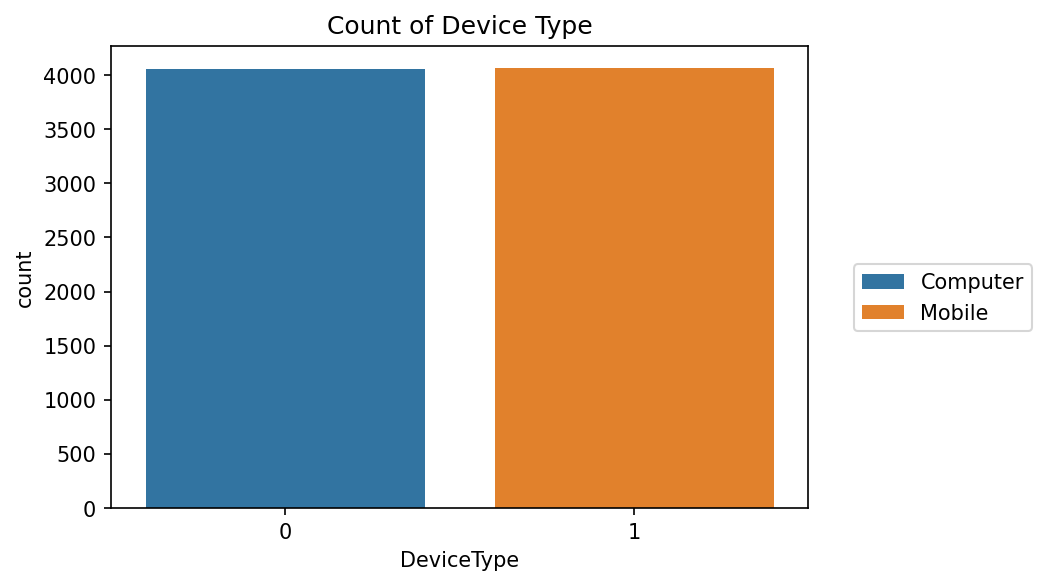

In [10]:
plt.figure(figsize = (6,4),dpi = 150)
sns.countplot(df, x = 'DeviceType',hue = 'DeviceType')
plt.legend(bbox_to_anchor = (1.05,0.55),labels = ['Computer','Mobile'])
plt.title('Count of Device Type')

Text(0.5, 1.0, 'Course Completion vs Time Spent on Course')

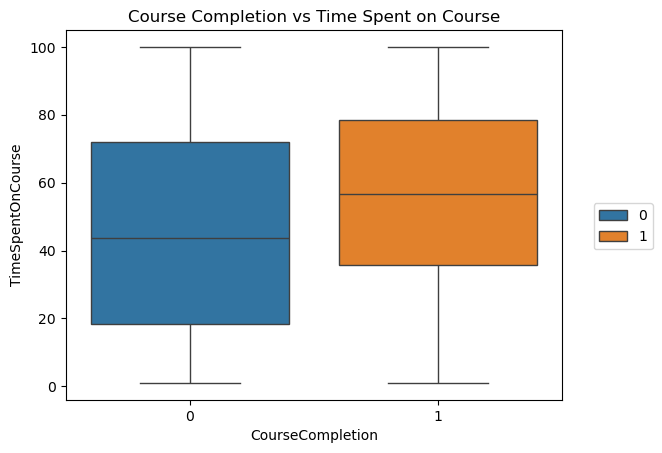

In [18]:
sns.boxplot(df, x = 'CourseCompletion',y = 'TimeSpentOnCourse',hue = 'CourseCompletion')
plt.legend(bbox_to_anchor = (1.05,0.55))
plt.title('Course Completion vs Time Spent on Course')

Let's take a look at how the numeric categories are related to the target variable (CourseCompletion)

In [19]:
df.corr(numeric_only=True)['CourseCompletion'].sort_values()

DeviceType               0.008663
UserID                   0.021000
TimeSpentOnCourse        0.186399
NumberOfVideosWatched    0.239476
NumberOfQuizzesTaken     0.291650
QuizScores               0.304706
CompletionRate           0.328800
CourseCompletion         1.000000
Name: CourseCompletion, dtype: float64

<Axes: >

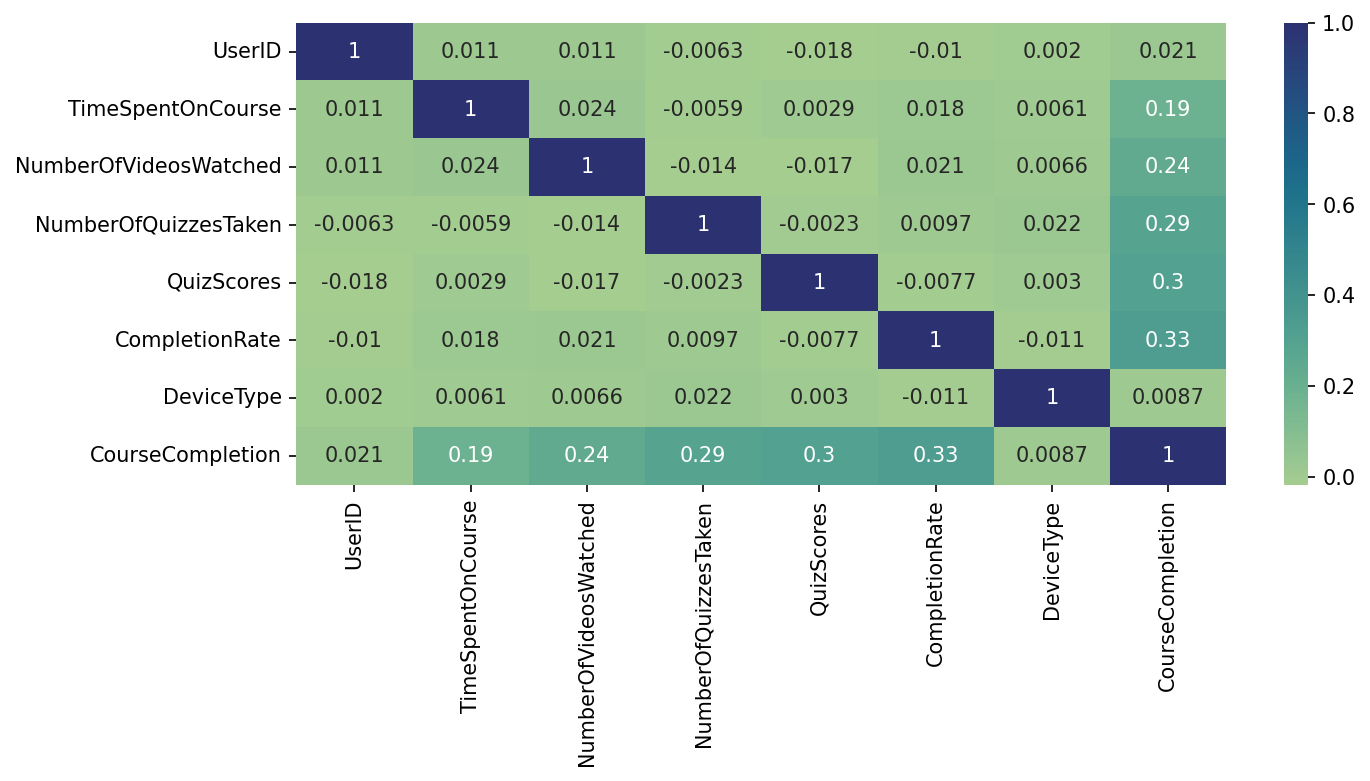

In [20]:
plt.figure(figsize=(10,4),dpi = 150)
sns.heatmap(df.drop('CourseCategory',axis = 1).corr(),annot = True,cmap = 'crest',linecolor = 'k')

Before we get started creating our models, we need to convert our **CourseCategory** data, to numerical data. This can be done by using the Pandas *get_dummies* built-in fuction. However, using this function will add more columns to our data frame. Instead, we can use the *Label Encoder* from SciKit Learn to transfrom the category to a numerical value while maintaining the number the columns in the original data frame. 

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
df['CourseCategory'] = le.fit_transform(df['CourseCategory'])
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,2,29.979719,17,3,50.365656,20.860773,1,0
1,4326,0,27.802640,1,5,62.615970,65.632415,1,0
2,5849,0,86.820485,14,2,78.458962,63.812007,1,1
3,4992,4,35.038427,17,10,59.198853,95.433162,0,1
4,3866,3,92.490647,16,0,98.428285,18.102478,0,0


Now we can begin scaling our data, split our data, and create our models. 

In [23]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
X = df.drop('CourseCompletion',axis = 1)
y = df['CourseCompletion']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [26]:
scaled_X_train = mmscaler.fit_transform(X_train)
scaled_X_test = mmscaler.transform(X_test)

### Model Fitting and Evaluation

We will create three models: Random Forest Classifier, Support Vector Classifier, GaussianNB

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(scaled_X_train,y_train)
rfc_preds = rfc.predict(scaled_X_test)

In [28]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay, mean_absolute_error,mean_squared_error

In [29]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1423
           1       0.95      0.95      0.95      1014

    accuracy                           0.96      2437
   macro avg       0.96      0.96      0.96      2437
weighted avg       0.96      0.96      0.96      2437



In [31]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(scaled_X_train,y_train)
svc_pred = svc.predict(scaled_X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1423
           1       0.83      0.83      0.83      1014

    accuracy                           0.86      2437
   macro avg       0.85      0.85      0.85      2437
weighted avg       0.86      0.86      0.86      2437



In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(scaled_X_train,y_train)
gnb_pred = gnb.predict(scaled_X_test)
print(classification_report(y_test,gnb_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1423
           1       0.80      0.77      0.79      1014

    accuracy                           0.83      2437
   macro avg       0.82      0.82      0.82      2437
weighted avg       0.82      0.83      0.83      2437



In [33]:
#RFC Confusion Matrix 
rfc_confusion = ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_preds),
                                       display_labels=['Not Completed','Completed'])


#SVC Confusion Matrix 
svc_confusion = ConfusionMatrixDisplay(confusion_matrix(y_test,svc_pred),
                                       display_labels=['Not Completed','Completed'])


#Gaussian NB Confusion Matrix 
gnb_confusion = ConfusionMatrixDisplay(confusion_matrix(y_test,gnb_pred),
                                       display_labels=['Not Completed','Completed'])

model = [rfc_confusion,svc_confusion,gnb_confusion]
model_name = ['Random Forest Classifier','Support Vector Classifier','Gaussian Naive Bayes']

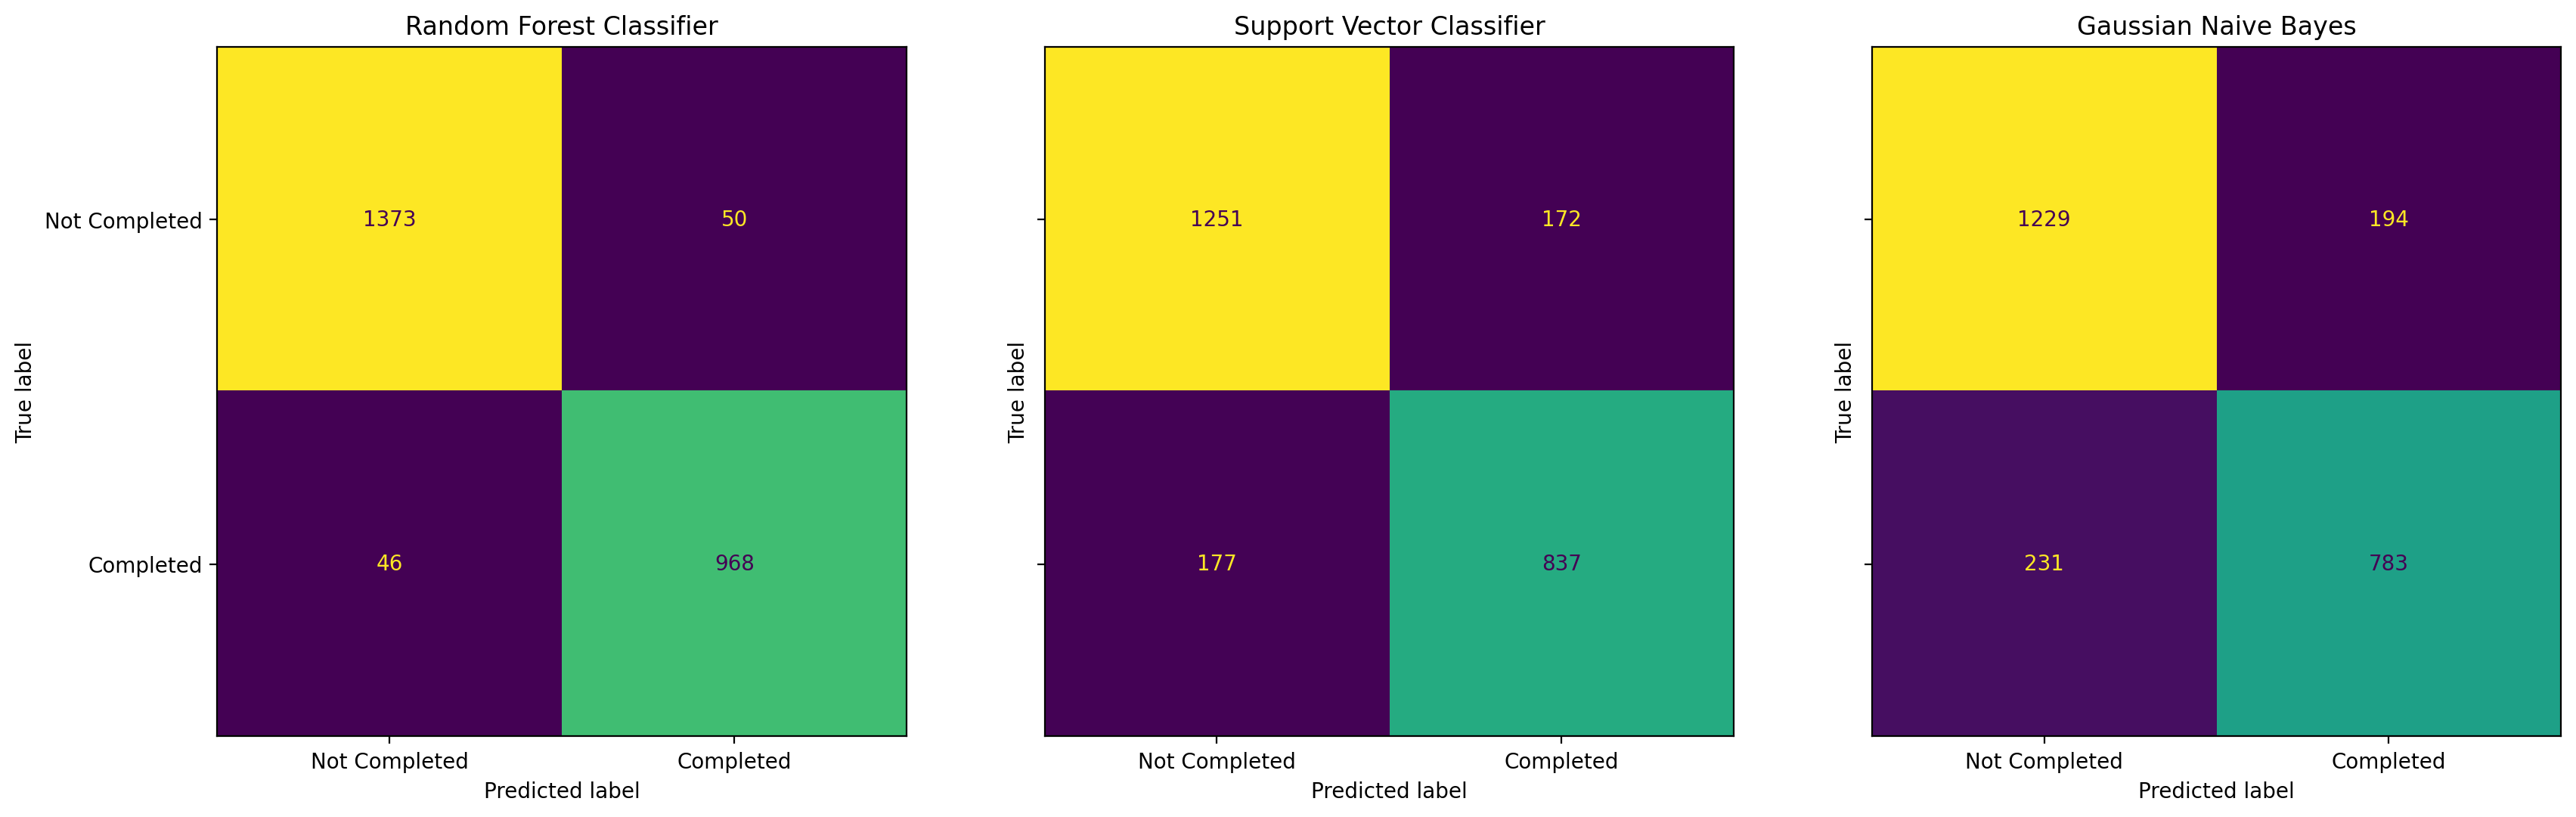

In [34]:
f,ax = f,ax = plt.subplots(1,3,sharey=True,figsize = (20,10),dpi = 200)
for i in range(0,3):
    model[i].plot(ax = ax[i])
    model[i].ax_.set_title(model_name[i])
    model[i].im_.colorbar.remove()   

### Conclusion 

From the clasfication reports and confusino matrices above, we can conclude that a Random Forest Classifier is the best suited model to predict if a student will complete the course or not based on the provided metrics. The RFC model had the highest accuracy result and the lowest number of false positive (50) and false negatives (46). 